In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import logging
import importlib
importlib.reload(logging) # see https://stackoverflow.com/a/21475297/1469195
log = logging.getLogger()
log.setLevel('DEBUG')
logging.basicConfig(format='%(asctime)s %(levelname)s : %(message)s',
                     level=logging.DEBUG, stream=sys.stdout)

In [3]:
sys.path.append("/home/gemeinl/code/brainfeatures/")

In [5]:
from brainfeatures.data_set.tuh_abnormal import TuhAbnormal

In [6]:
from brainfeatures.visualization.visualize import histogram

2019-12-06 23:01:38,513 DEBUG : CACHEDIR=/home/gemeinl/.cache/matplotlib
2019-12-06 23:01:38,521 DEBUG : Using fontManager instance from /home/gemeinl/.cache/matplotlib/fontlist-v300.json
2019-12-06 23:01:38,632 DEBUG : Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-12-06 23:01:38,638 DEBUG : Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

2019-12-06 23:01:40,762 DEBUG : Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [8]:
import pandas as pd

In [9]:
dfs = {"train": None,    
       "eval": None}

In [10]:
for subset in dfs.keys():
    ds = TuhAbnormal("/data/schirrmr/gemeinl/tuh-abnormal-eeg/raw/v2.0.0/edf/{}/".format(subset), 
                     extension=".edf", target="pathological", max_recording_mins=None,
                     subset=subset)
    ds.load()
    df = pd.DataFrame.from_dict({"ages": ds.ages, "genders": ds.genders, "pathologicals": ds.pathologicals}) 
    dfs[subset] = df

In [13]:
dfs["train"].mean(), dfs["train"].std()

(ages             49.108576
 genders           0.532573
 pathologicals     0.495399
 dtype: float64, ages             17.601598
 genders           0.499030
 pathologicals     0.500071
 dtype: float64)

In [14]:
dfs["eval"].mean(), dfs["eval"].std()

(ages             50.677536
 genders           0.536232
 pathologicals     0.456522
 dtype: float64, ages             18.330729
 genders           0.499591
 pathologicals     0.499011
 dtype: float64)

2019-12-06 23:06:12,744 DEBUG : update_title_pos
2019-12-06 23:06:12,748 DEBUG : not adjusting title pos because title was already placed manually: 0.950000
2019-12-06 23:06:12,861 DEBUG : update_title_pos
2019-12-06 23:06:12,864 DEBUG : not adjusting title pos because title was already placed manually: 0.950000
2019-12-06 23:06:12,960 DEBUG : update_title_pos
2019-12-06 23:06:12,964 DEBUG : not adjusting title pos because title was already placed manually: 0.950000
2019-12-06 23:06:13,075 DEBUG : update_title_pos
2019-12-06 23:06:13,078 DEBUG : not adjusting title pos because title was already placed manually: 0.950000
2019-12-06 23:06:13,180 DEBUG : update_title_pos
2019-12-06 23:06:13,183 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:13,475 DEBUG : update_title_pos
2019-12-06 23:06:13,478 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:13,633 DEBUG : update_title_pos
2019-12-06 23:06:13,636 DEBUG : title position was updated 

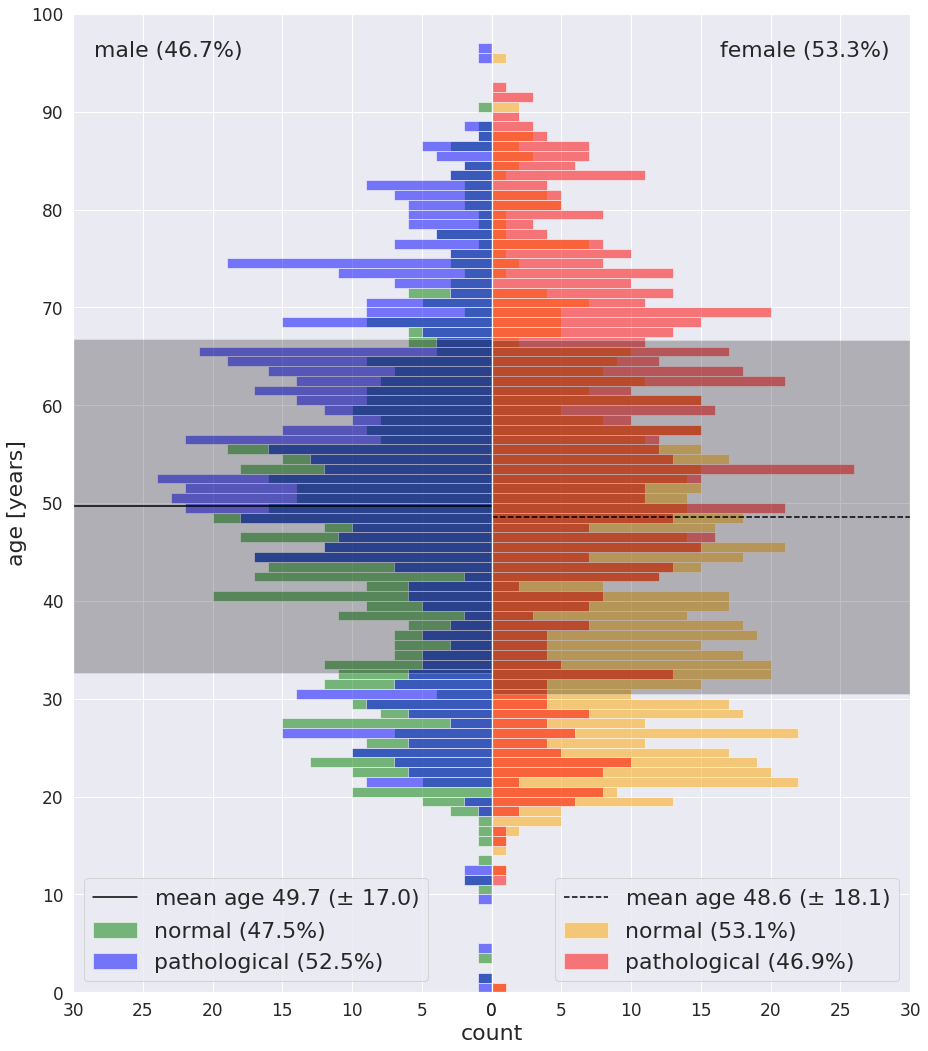

2019-12-06 23:06:14,377 DEBUG : update_title_pos
2019-12-06 23:06:14,379 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:14,469 DEBUG : update_title_pos
2019-12-06 23:06:14,472 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:14,627 DEBUG : update_title_pos
2019-12-06 23:06:14,630 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:14,718 DEBUG : update_title_pos
2019-12-06 23:06:14,721 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:14,942 DEBUG : update_title_pos
2019-12-06 23:06:14,945 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:15,032 DEBUG : update_title_pos
2019-12-06 23:06:15,035 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:15,130 DEBUG : update_title_pos
2019-12-06 23:06:15,133 DEBUG : title position was updated manually, not adjusting
2019-12-06 23:06:15,228 DEBUG : update_title_pos
2019-12-06 23:06:15,231 DEB

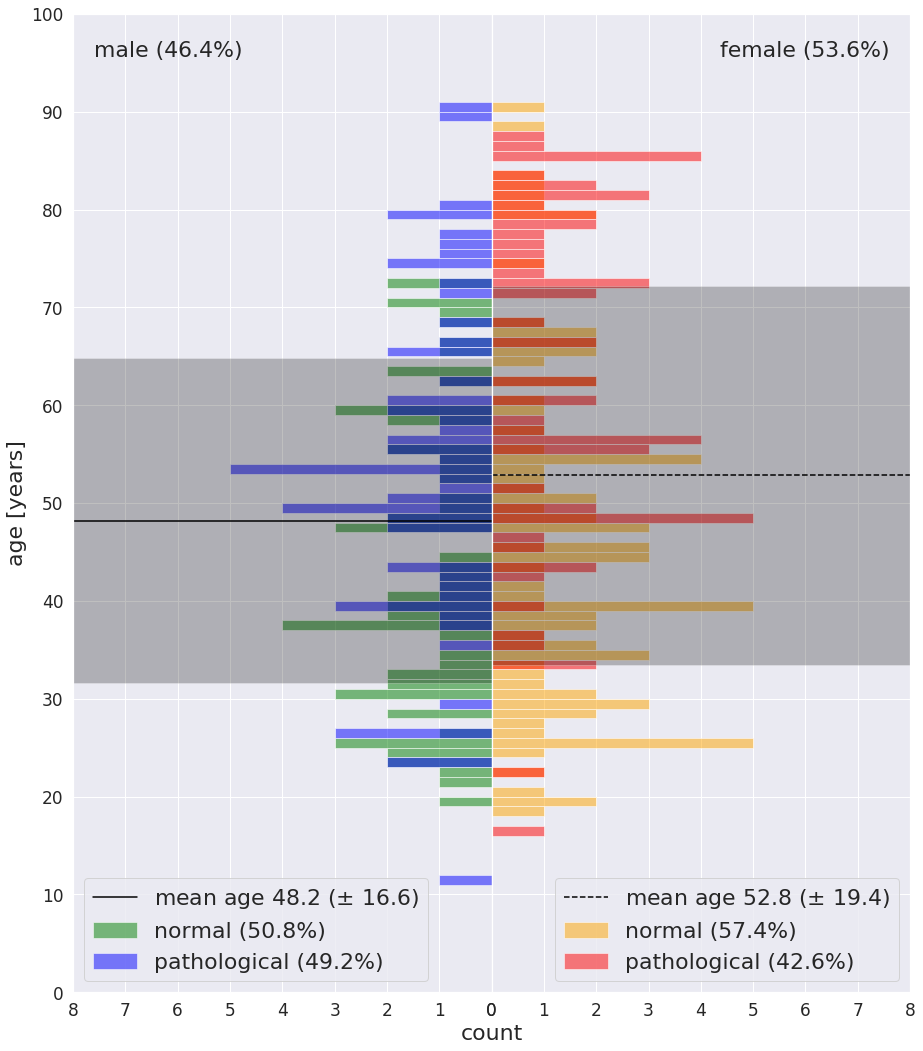

In [16]:
for subset, df in dfs.items():
    ylim = 30 if subset == "train" else 8
    histogram(
        df_of_ages_genders_and_pathology_status=df, 
        train_or_eval=subset, 
        ylim=ylim, 
        fs=22, 
        show_title=False, 
        data_format="pdf"
    )